# Application with new data (3D)

This tutorial demonstrates spatial clustering on 3D mouse visual cortex data using Pysodb.

A reference paper can be found at https://www-science-org.ezproxy.is.ed.ac.uk/doi/full/10.1126/science.aat5691.

## Import packages and set configurations

In [1]:
# Use the Python warnings module to filter and ignore any warnings that may occur in the program after this point.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# scanpy (imported as sc) is a package for single-cell RNA sequencing analysis
import scanpy as sc
# matplotlib.pyplot (imported as plt) is a package for data visualization
import matplotlib.pyplot as plt


In [3]:
# Import STAGATE_pyG package
import STAGATE_pyG as STAGATE

In [4]:
# Imports a palettable package
import palettable
# Define three color maps, a diverging color map (cmp_pspace), and two qualitative color maps (cmp_domain and cmp_ct)
cmp_pspace = palettable.cartocolors.diverging.TealRose_7.mpl_colormap
cmp_domain = palettable.cartocolors.qualitative.Pastel_10.mpl_colors
cmp_ct = palettable.cartocolors.qualitative.Safe_10.mpl_colors

## Streamline development of loading spatial data with Pysodb

In [5]:
# Import pysodb package
# Pysodb is a Python package that provides a set of tools for working with SODB databases. 
# SODB is a format used to store data in memory-mapped files for efficient access and querying. 
# This package allows users to interact with SODB files using Python.
import pysodb 

In [6]:
# Initialization
sodb = pysodb.SODB()

In [7]:
# Define names of the dataset_name and experiment_name
dataset_name = 'Wang2018three'
experiment_name = 'data_3D'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
adata = sodb.load_experiment(dataset_name,experiment_name)

load experiment[data_3D] in dataset[Wang2018three]


## Data processing

In [8]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [9]:
adata.obsm['spatial_3D'] = adata.obs[['x','y','z']].values

## Constructing the spatial network with diverse rad_cutoff

------Calculating spatial graph...
The graph contains 369952 edges, 32845 cells.
11.2636 neighbors per cell on average.
Size of Input:  (32845, 28)


100%|██████████| 1000/1000 [00:27<00:00, 35.91it/s]


------Calculating spatial graph...
The graph contains 649580 edges, 32845 cells.
19.7771 neighbors per cell on average.
Size of Input:  (32845, 28)


100%|██████████| 1000/1000 [00:43<00:00, 22.99it/s]


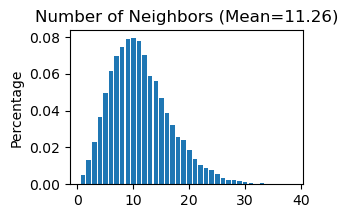

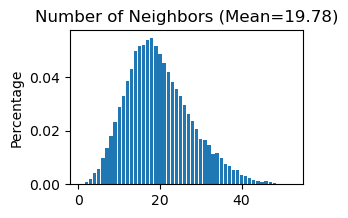

In [10]:
# Define a list with different radius cutoff values
rad_cutoff_list = [15,20]
# Consturcting network for different radius cutoff
for rad_cutoff in rad_cutoff_list:
    STAGATE.Cal_Spatial_Net(adata, rad_cutoff=rad_cutoff)
    STAGATE.Stats_Spatial_Net(adata)
    adata = STAGATE.train_STAGATE(adata)
    adata.obsm[f'STAGATE_rad{rad_cutoff}'] = adata.obsm['STAGATE'].copy()
# Save the adata object
adata.write_h5ad('3D_spatialnet_h5ad')

## Clustering and UMAP

### rad_cutoff=15

In [11]:
# Calculate the nearest neighbors in the 'STAGATE_rad15' representation and computes the UMAP embedding.
sc.pp.neighbors(adata, use_rep='STAGATE_rad15')
sc.tl.umap(adata)
# Perform a Leiden clustering with 'STAGATE_rad15' representation, and add a key_added as 'leiden_0.2'
sc.tl.leiden(adata,resolution=0.2,key_added='leiden_0.2')

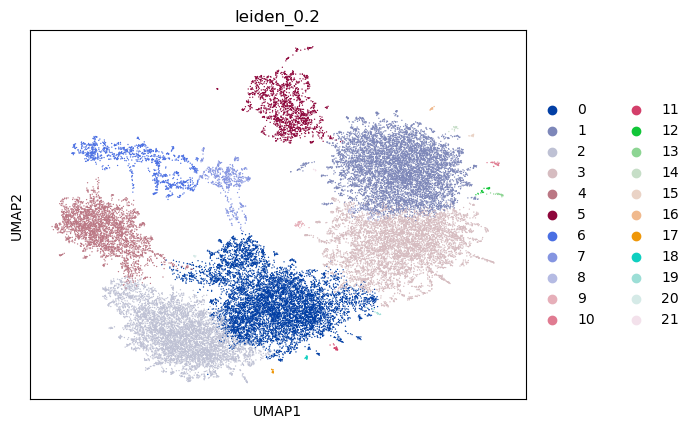

In [12]:
# Plot a UMAP embedding ('STAGATE_rad15') colored 'leiden_0.2'
sc.pl.umap(adata, color='leiden_0.2')

In [13]:
# Perform mclust clustering with 'STAGATE_rad15' representation, and set 'num_cluster' to 7
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE_rad15', num_cluster=7)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


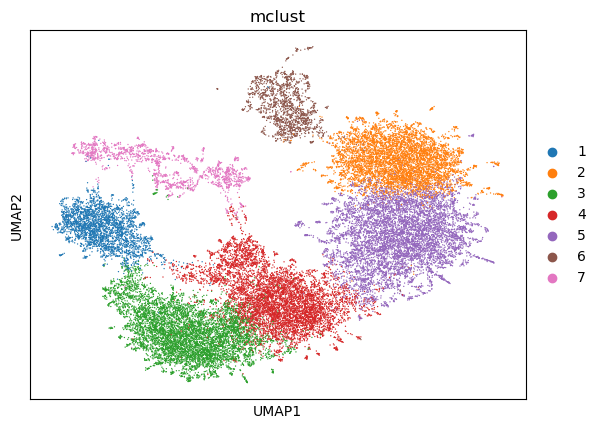

In [14]:
# Plot a UMAP embedding ('STAGATE_rad15') colored 'mclust'
sc.pl.umap(adata, color='mclust')

(-78.95, 1899.95, -64.7, 1600.7)

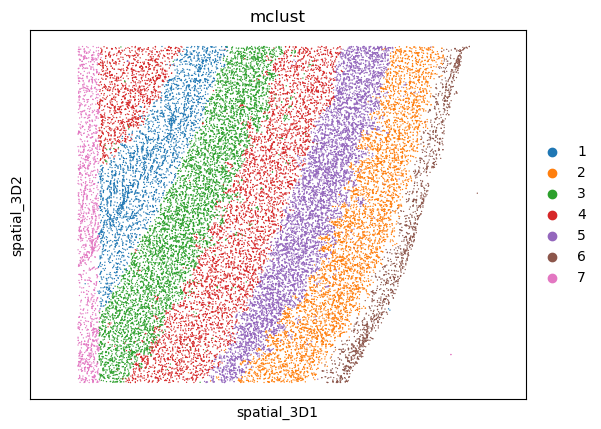

In [15]:
# Plot a spatial distribution ('STAGATE_rad15') base on 'spatial_3D' with 'mclust' clustering
ax = sc.pl.embedding(adata, basis='spatial_3D',color='mclust',show=False)
# Ensure a consistent aspect ratio along all three dimensions
ax.axis('equal')

### rad_cutoff=20

In [16]:
# Calculate the nearest neighbors in the 'STAGATE_rad15' representation and computes the UMAP embedding.
sc.pp.neighbors(adata, use_rep='STAGATE_rad20')
sc.tl.umap(adata)
# Perform a Leiden clustering with 'STAGATE_rad20' representation, and add a key_added as 'leiden_0.2'
sc.tl.leiden(adata,resolution=0.2,key_added='leiden_0.2')

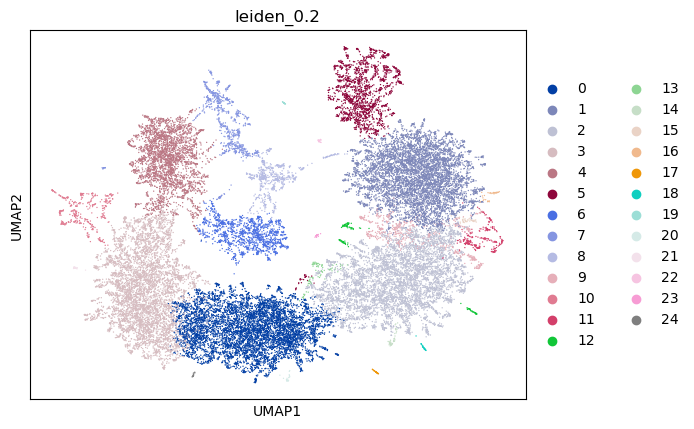

In [17]:
# Plot a UMAP embedding ('STAGATE_rad20') colored 'leiden_0.2'
sc.pl.umap(adata, color='leiden_0.2')

In [18]:
# Perform mclust clustering with 'STAGATE_rad20' representation, and set 'num_cluster' to 9
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE_rad20', num_cluster=9)

fitting ...
  |======================================================================| 100%


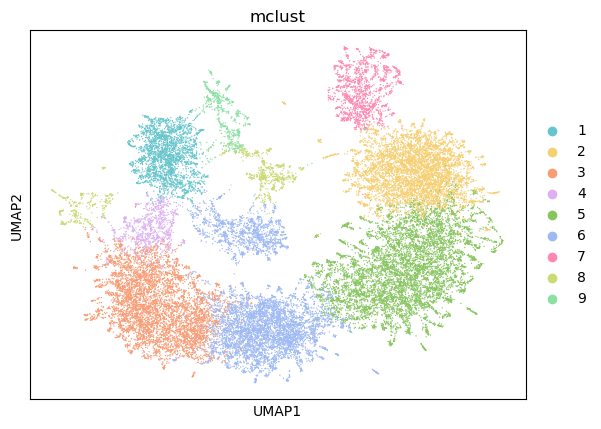

In [19]:
# Plot a UMAP embedding ('STAGATE_rad20') colored 'mclust'
sc.pl.umap(adata, color='mclust',palette=cmp_domain)
#plt.savefig('../figures/spatialclustering/3D_umap.png',dpi=400,transparent=True,bbox_inches='tight')

(-78.95, 1899.95, -64.7, 1600.7)

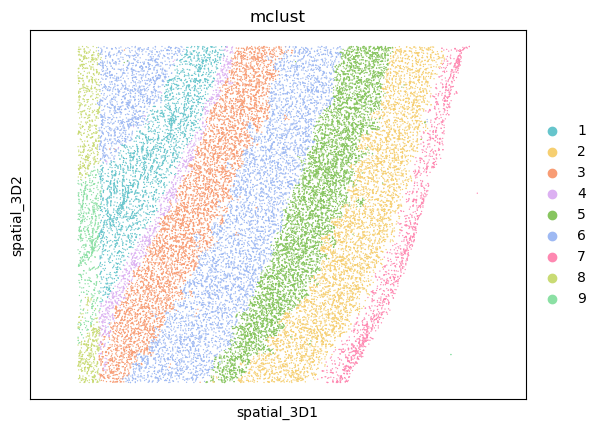

In [20]:
# Plot a spatial distribution ('STAGATE_rad20') base on 'spatial_3D' with 'mclust' clustering
ax = sc.pl.embedding(adata, basis='spatial_3D',color='mclust',palette=cmp_domain,show=False)
# Ensure a consistent aspect ratio along all three dimensions
ax.axis('equal')
#plt.savefig('../figures/spatialclustering/3D_spatial.png',dpi=400,transparent=True,bbox_inches='tight')

(-78.95000000000016,
 1899.9500000000003,
 -221.45000000000016,
 1757.4500000000003)

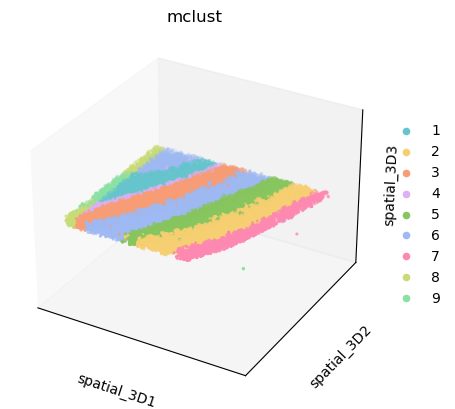

In [21]:
# Plot a spatial distribution ('STAGATE_rad20') base on 'spatial_3D' with 'mclust' clustering to project in a 3D space
ax = sc.pl.embedding(adata, basis='spatial_3D',color='mclust', projection='3d',palette=cmp_domain,show=False)
# Ensure a consistent aspect ratio along all three dimensions
ax.axis('equal')

<Axes3D: title={'center': 'mclust'}, xlabel='spatial_3D1', ylabel='spatial_3D2', zlabel='spatial_3D3'>

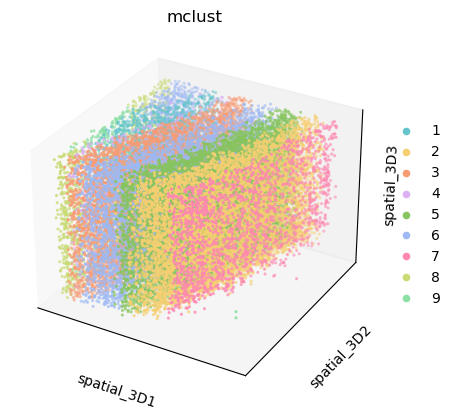

In [22]:
# Plot a spatial distribution ('STAGATE_rad20') base on 'spatial_3D' with 'mclust' clustering for for enhanced visualization
sc.pl.embedding(adata, basis='spatial_3D',color='mclust', projection='3d',palette=cmp_domain,show=False)

In [23]:
# Save the result object
adata.write_h5ad('3D_mclust.h5ad')